PYTORCH 1st implementation


In [1]:
import torch


In [2]:
torch.__version__

'1.5.1'

In [3]:
import numpy as np


In [4]:
lst=[3,4,5,6]
arr=np.array(lst)

In [5]:
arr.dtype

dtype('int32')

In [6]:
tensors=torch.from_numpy(arr)
tensors


tensor([3, 4, 5, 6], dtype=torch.int32)

In [7]:
tensors[:2]

tensor([3, 4], dtype=torch.int32)

In [8]:
tensors[1:4]

tensor([4, 5, 6], dtype=torch.int32)

In [9]:
for i in range(len(tensors)):
    print(tensors[i])

tensor(3, dtype=torch.int32)
tensor(4, dtype=torch.int32)
tensor(5, dtype=torch.int32)
tensor(6, dtype=torch.int32)


In [10]:
torch.zeros(2,3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [11]:
torch.ones(3,3)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [12]:
a=torch.tensor([3,4,5])
b=torch.tensor([5,6,7])
c=a+b
print(c)

tensor([ 8, 10, 12])


In [13]:
torch.add(a,b)

tensor([ 8, 10, 12])

In [14]:
a.dot(b)

tensor(74)

In [15]:
a@b

tensor(74)

BackPropogation using pytorch

In [16]:
x=torch.tensor(4.0,requires_grad=True)

In [17]:
x

tensor(4., requires_grad=True)

In [18]:
#y=x^2
y=x**2
y

tensor(16., grad_fn=<PowBackward0>)

In [19]:
#Back Propagation
y.backward()
y

tensor(16., grad_fn=<PowBackward0>)

In [20]:
print(x.grad)

tensor(8.)


In [21]:
torch_input=torch.tensor([[2.,3.,1.],[4.,5.,3.],[7.,6.,4.]],requires_grad=True)

In [22]:
torch_input

tensor([[2., 3., 1.],
        [4., 5., 3.],
        [7., 6., 4.]], requires_grad=True)

In [23]:
#y=x^3+x^2
y=torch_input**3+torch_input**2

In [24]:
y

tensor([[ 12.,  36.,   2.],
        [ 80., 150.,  36.],
        [392., 252.,  80.]], grad_fn=<AddBackward0>)

In [25]:
z=y.sum()
z

tensor(1040., grad_fn=<SumBackward0>)

In [26]:
#3*x^2+2*x
torch_input.grad

In [27]:
tensor=torch.tensor([[2,3,4],[1,2,3]])

In [28]:
if torch.cuda.is_available():
    tensor=tensor.to('cuda')
    print("Device tensor is stored on",tensor.device)

Device tensor is stored on cuda:0


In [29]:
torch.is_tensor(tensor)
torch.is_storage(tensor)

False

Creating an ANN using Pytorch

In [101]:
import pandas as pd
df=pd.read_csv('diabetes.csv')

In [102]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [103]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [104]:
import seaborn as sns

In [105]:
import numpy as np
df['Outcome']=np.where(df['Outcome']==1,"Diabetic","No Diabetic")

In [106]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age      Outcome  
0                     0.627   50     Diabetic  
1                     0.351   31  No Diabetic  
2                     0.672   32     Diabetic  
3                     0.167   21  No Diabetic  
4                     2.288   33     Diabetic

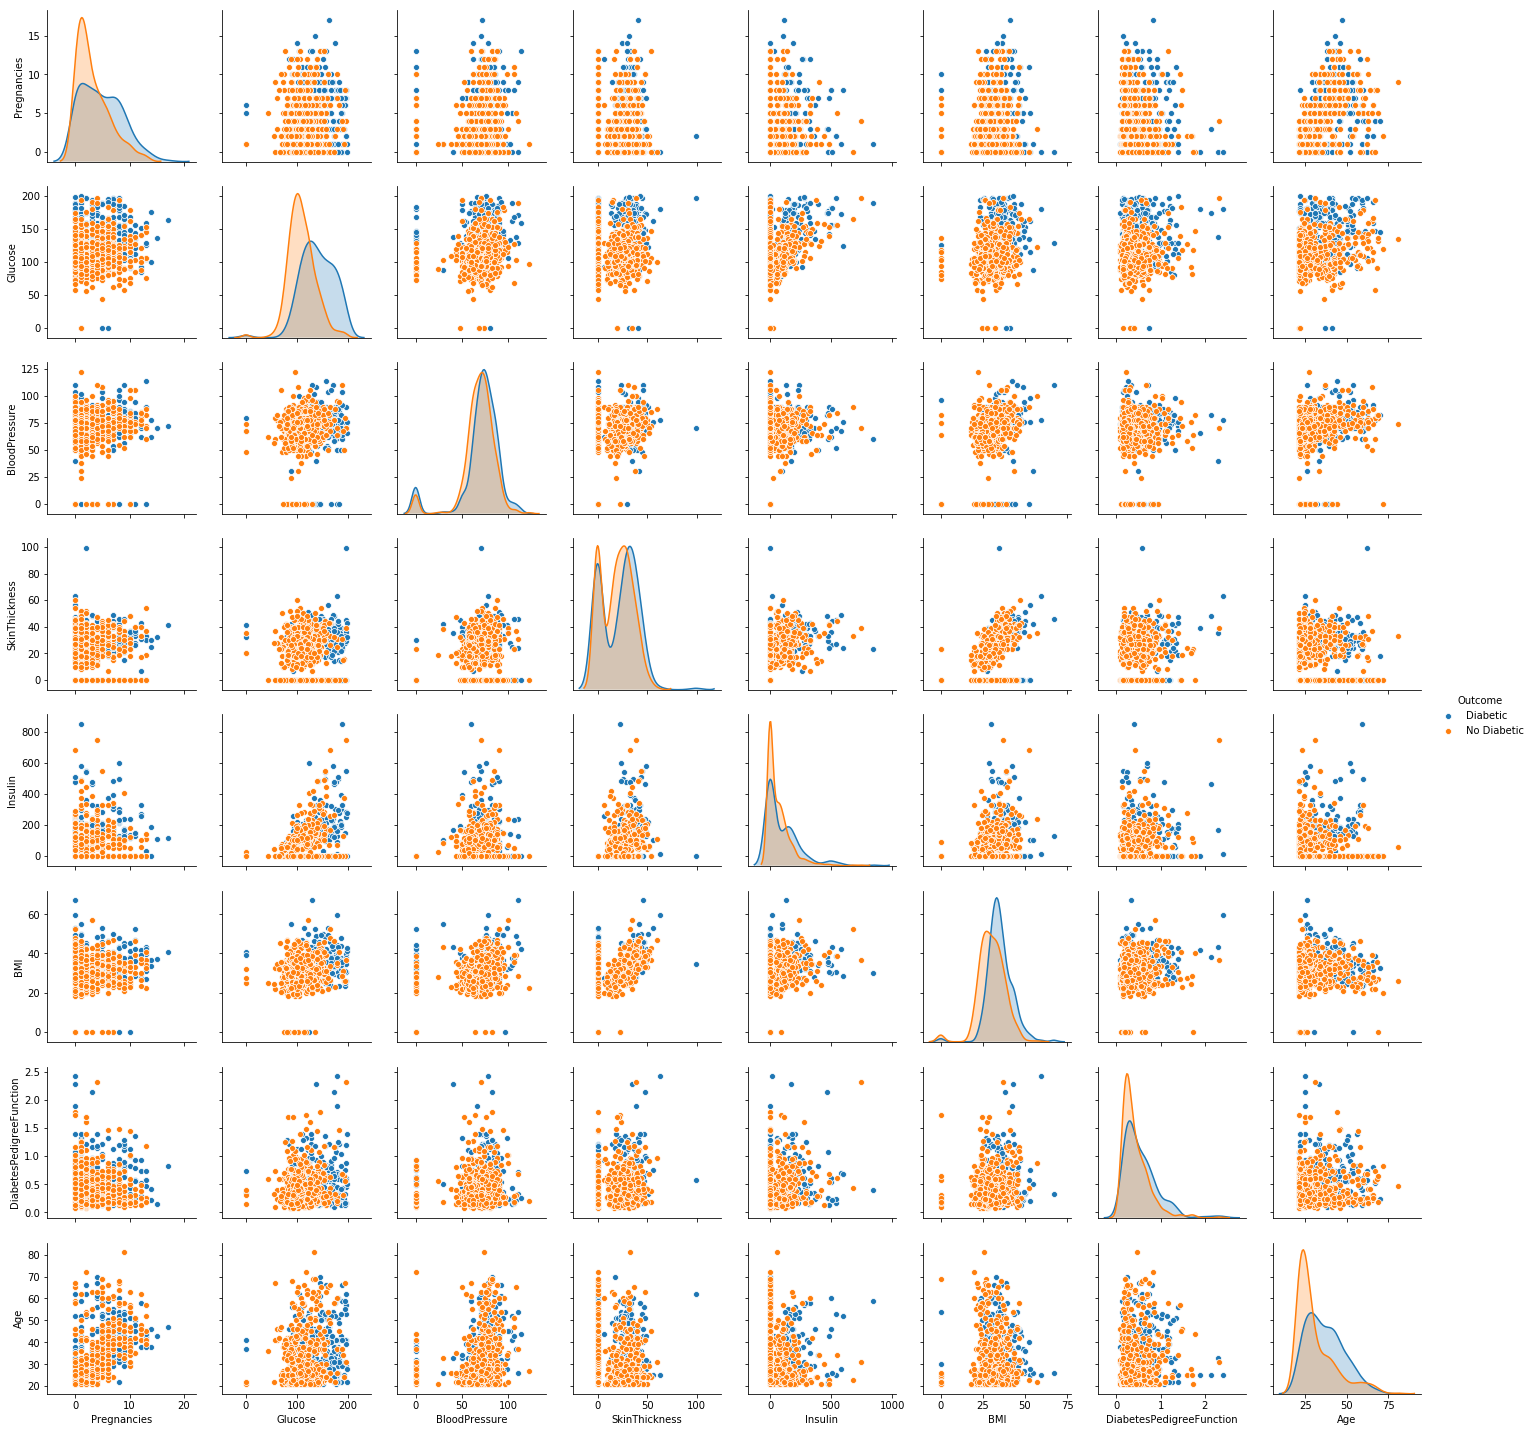

In [107]:
sns.pairplot(df,hue="Outcome")

In [108]:
df=pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [109]:
X=df.drop('Outcome',axis=1).values  
y=df['Outcome'].values

In [110]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [111]:
import torch
import torch.nn as nn
import torch.nn.functional as F



In [112]:
#### Creting Tensors
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [113]:
df.shape

(768, 9)

In [119]:
##Creating Model with Pytorch

class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x


In [120]:
##instantiate my ANN_model
torch.manual_seed(20)
model=ANN_Model()


In [121]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [122]:
###Backward Propogation -- Define Losss function and optimizer
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [123]:
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print('Epoch number: {} and the loss : {}'.format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 3.457212209701538
Epoch number: 11 and the loss : 0.8019211292266846
Epoch number: 21 and the loss : 0.6090323328971863
Epoch number: 31 and the loss : 0.5917770862579346
Epoch number: 41 and the loss : 0.5679707527160645
Epoch number: 51 and the loss : 0.5529038906097412
Epoch number: 61 and the loss : 0.5410097241401672
Epoch number: 71 and the loss : 0.5310391187667847
Epoch number: 81 and the loss : 0.522036075592041
Epoch number: 91 and the loss : 0.5135970711708069
Epoch number: 101 and the loss : 0.5061254501342773
Epoch number: 111 and the loss : 0.49834102392196655
Epoch number: 121 and the loss : 0.49605506658554077
Epoch number: 131 and the loss : 0.4828639328479767
Epoch number: 141 and the loss : 0.4756038188934326
Epoch number: 151 and the loss : 0.48334574699401855
Epoch number: 161 and the loss : 0.4882746934890747
Epoch number: 171 and the loss : 0.47058171033859253
Epoch number: 181 and the loss : 0.47636398673057556
Epoch number: 191 an

In [124]:
## plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline


Text(0.5, 0, 'Epochs')

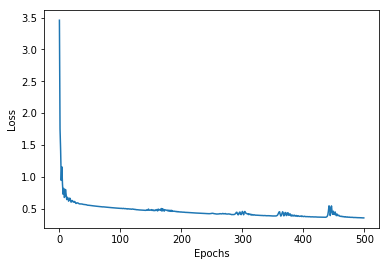

In [125]:
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel("Epochs")

In [140]:
#### Prediction with Test_Data
predictions=[]
with torch.no_grad():    
    for i ,data in enumerate(X_test):
        y_pred=model(data)
        
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
1
0
1
1
0
1
0
0
1
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0
1
0
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
0
1
1
0
0
1
0
1
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0


In [141]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[92, 15],
       [17, 30]], dtype=int64)

In [142]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

Text(69.0, 0.5, 'Predicted Values')

In [143]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.7922077922077922

In [144]:
#Save the model
torch.save(model,'diabetes.pt')

C:\Users\Srikanth\.conda\envs\envpytorch\lib\site-packages\torch\serialization.py:402: UserWarning: Couldn't retrieve source code for container of type ANN_Model. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [145]:
#Save and Load the model
model=torch.load('diabetes.pt')

In [146]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [148]:
#Prediction of new datapoint
list(df.iloc[0,:-1])


[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [156]:
lst1=[1.0, 8.0, 52.0, 39.0, 0.0, 45.6, 0.927, 50.0]

In [157]:
new_data=torch.tensor(lst1)

In [158]:
#Predict new data
with torch.no_grad():    
        print(model(new_data))
        print(model(new_data).argmax().item())

tensor([-7.9619,  6.2837])
1
